In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The fashion MNIST dataset: Clothing Classification

In [2]:
# load the fashion-MNIST data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_train.csv'
data = pd.read_csv(url)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462745,0.400000,0.40000,0.188235,0.0,0.0,0.003922,0.0,0.0,0.0
3,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003045,0.002876,0.00303,0.002968,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
# feature matrix/target vector
y = data.label # labels 
X = data.drop('label', axis=1) # pixels

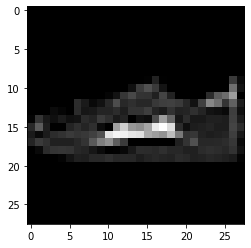

In [28]:
plt.imshow(X.iloc[15].values.reshape(28,28), cmap='gray')

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. The following figure shows a few images from the fashion-MNIST dataset

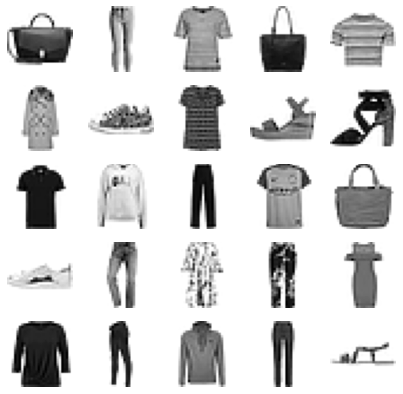

In [4]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X.loc[i].values.reshape(28,28),cmap='binary')
    plt.axis('off')  

**Labels:**

| Label | Description |
| :- | -: |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

**Part 1:** We are going to train a k-nearest neighbor model that predicts the labels of clothing images.

Import and instantiate a k-nearest neighbors model

In [21]:
X_train = X
y_train = y
# setup knn model
from sklearn.neighbors import KNeighborsClassifier as knn
knn_clf = knn(n_neighbors=10)
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

Use a grid search to tune in the classifier hyperparameters `n_neighbors` and `weights`

In [22]:
k_range = list(range(1,51)) # number of neighors in knn model to test
grid_dic = {'n_neighbors':k_range, 'weights':['uniform', 'distance']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn_clf, grid_dic, cv=10, scoring='accuracy', n_jobs= -1, verbose=1)
grid.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [29]:
# examine the best model hyperparameters
results = pd.DataFrame(grid.cv_results_)
results[['mean_test_score', 'params']]


,mean_test_score,params
0,0.7854,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.7854,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.7836,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.7854,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.7804,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...
95,0.7566,"{'n_neighbors': 48, 'weights': 'distance'}"
96,0.7498,"{'n_neighbors': 49, 'weights': 'uniform'}"
97,0.7554,"{'n_neighbors': 49, 'weights': 'distance'}"
98,0.7506,"{'n_neighbors': 50, 'weights': 'uniform'}"


In [39]:
# best classifier
best_knn_clf = grid.best_estimator_
best_knn_clf


KNeighborsClassifier(n_neighbors=10, weights='distance')

**Part 2:** We'll use accuracy and a confusion matrix to evaluate the performance of our model on the test set.

In [31]:
# load the training data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_test.csv'
data_test = pd.read_csv(url)

# feature matrix/target vector 
y_test = data_test.label # labels 
X_test = data_test.iloc[:,1:785] # pixels

In [32]:
# import accuracy_score and confusion_matrix from sklearn.metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
y_test_pred = best_knn_clf.predict(X_test)


In [33]:
# accuracy
print(accuracy_score(y_test,y_test_pred))

0.7805


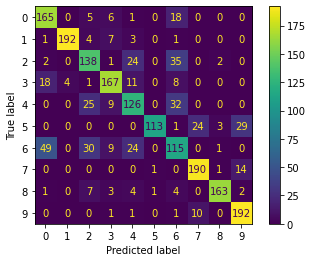

In [34]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(best_knn_clf,X_test,y_test)

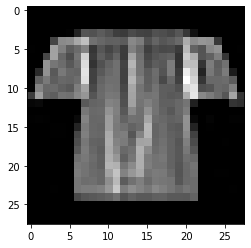

In [43]:
# Take a look at why 6 is mislabled as 0,2,4
plt.imshow(X_test.loc[(y_test==6) &(y_test_pred==0)].iloc[5].values.reshape(28,28), cmap='gray')